In [1]:
import warnings                                                    
warnings.filterwarnings("ignore", category=FutureWarning)

# <font color='red'> Applied Machine Learning

### Regression Task: ``Audit_Risk`` as target columns
- Applying various regression models and tuning its respective scaling parameter(s) with Grid Search. Using plots and graphs to get a better glimpse of the results.
- Use cross validation to find average training and testing score.
- Regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels.
- Determining the best regressor for this dataset and train  model on the entire dataset using the best parameters and predict for the test_set.

### Classification Task: ``Risk`` as the target column
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for following classication models
- Determine the model that provides the best results.



# Data Cleaning 

In [2]:
import pandas as pd
audit_risk = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

In [3]:
print(audit_risk.shape)
audit_risk.head()

(776, 27)


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
pd.options.display.max_columns = None
display(audit_risk.head(5))

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [5]:
print(trial.shape)
trial.head()

(776, 18)


,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


Performed an inner join on the two datasets 

In [6]:
data= pd.merge(audit_risk, trial, how= "inner")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 35 columns):
Sector_score      629 non-null float64
LOCATION_ID       629 non-null object
PARA_A            629 non-null float64
Score_A           629 non-null float64
Risk_A            629 non-null float64
PARA_B            629 non-null float64
Score_B           629 non-null float64
Risk_B            629 non-null float64
TOTAL             629 non-null float64
numbers           629 non-null float64
Score_B.1         629 non-null float64
Risk_C            629 non-null float64
Money_Value       628 non-null float64
Score_MV          629 non-null float64
Risk_D            629 non-null float64
District_Loss     629 non-null int64
PROB              629 non-null float64
RiSk_E            629 non-null float64
History           629 non-null int64
Prob              629 non-null float64
Risk_F            629 non-null float64
Score             629 non-null float64
Inherent_Risk     629 non-null float64
CON

In [7]:
audit_risk['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

Data can not contain non-numeric values. Non-numeric instances in LOCATION_ID ('LOHARU', 'NUH', 'SAFIDON')  are removed.

In [8]:
data = data[data['LOCATION_ID'].apply(lambda x: str(x).isdigit())]
data["LOCATION_ID"] = pd.to_numeric(data["LOCATION_ID"])

In [9]:
data.isna().sum()
print(data.columns)

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'SCORE_A', 'SCORE_B', 'Marks',
       'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score'],
      dtype='object')


In [10]:
data[data.isnull().any(axis=1)] #show the row with the missing value

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
512,55.57,4,0.23,0.2,0.046,0.0,0.2,0.0,0.23,5.0,0.2,1.0,NaN,0.2,0.0,2,0.2,0.4,0,0.2,0.0,2.0,1.446,0.4,0.5,0.2892,0,2,2,2,2,2,0,2,2


In [11]:
data.dropna(inplace=True)

The single instance of NaN value in the Money_Value column is removed to attain a full numeric dataset. 

Some of the columns in trial.csv are 10 times of the value of the columns in in audit_risk.csv. This might bring in unnecessary noise and influence the analysis process. Therefore, the following columns are dropped and the rest of the dataset will be scaled.

In [12]:
data=data.drop(['SCORE_A','SCORE_B', 'Marks','MONEY_Marks','District', 'Loss', 'LOSS_SCORE', 'History_score'], axis=1)

In [13]:
data.shape

(625, 27)

The dataset contains 635 rows and 27 columns and is now ready for analysis.

C:\Users\Johnny\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.5, right=0.5
  ax.set_xlim(boundaries_list[j])
C:\Users\Johnny\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.5, top=0.5
  ax.set_ylim(boundaries_list[i])
C:\Users\Johnny\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.5, right=0.5
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002390F0B7160>,
      dtype=object)

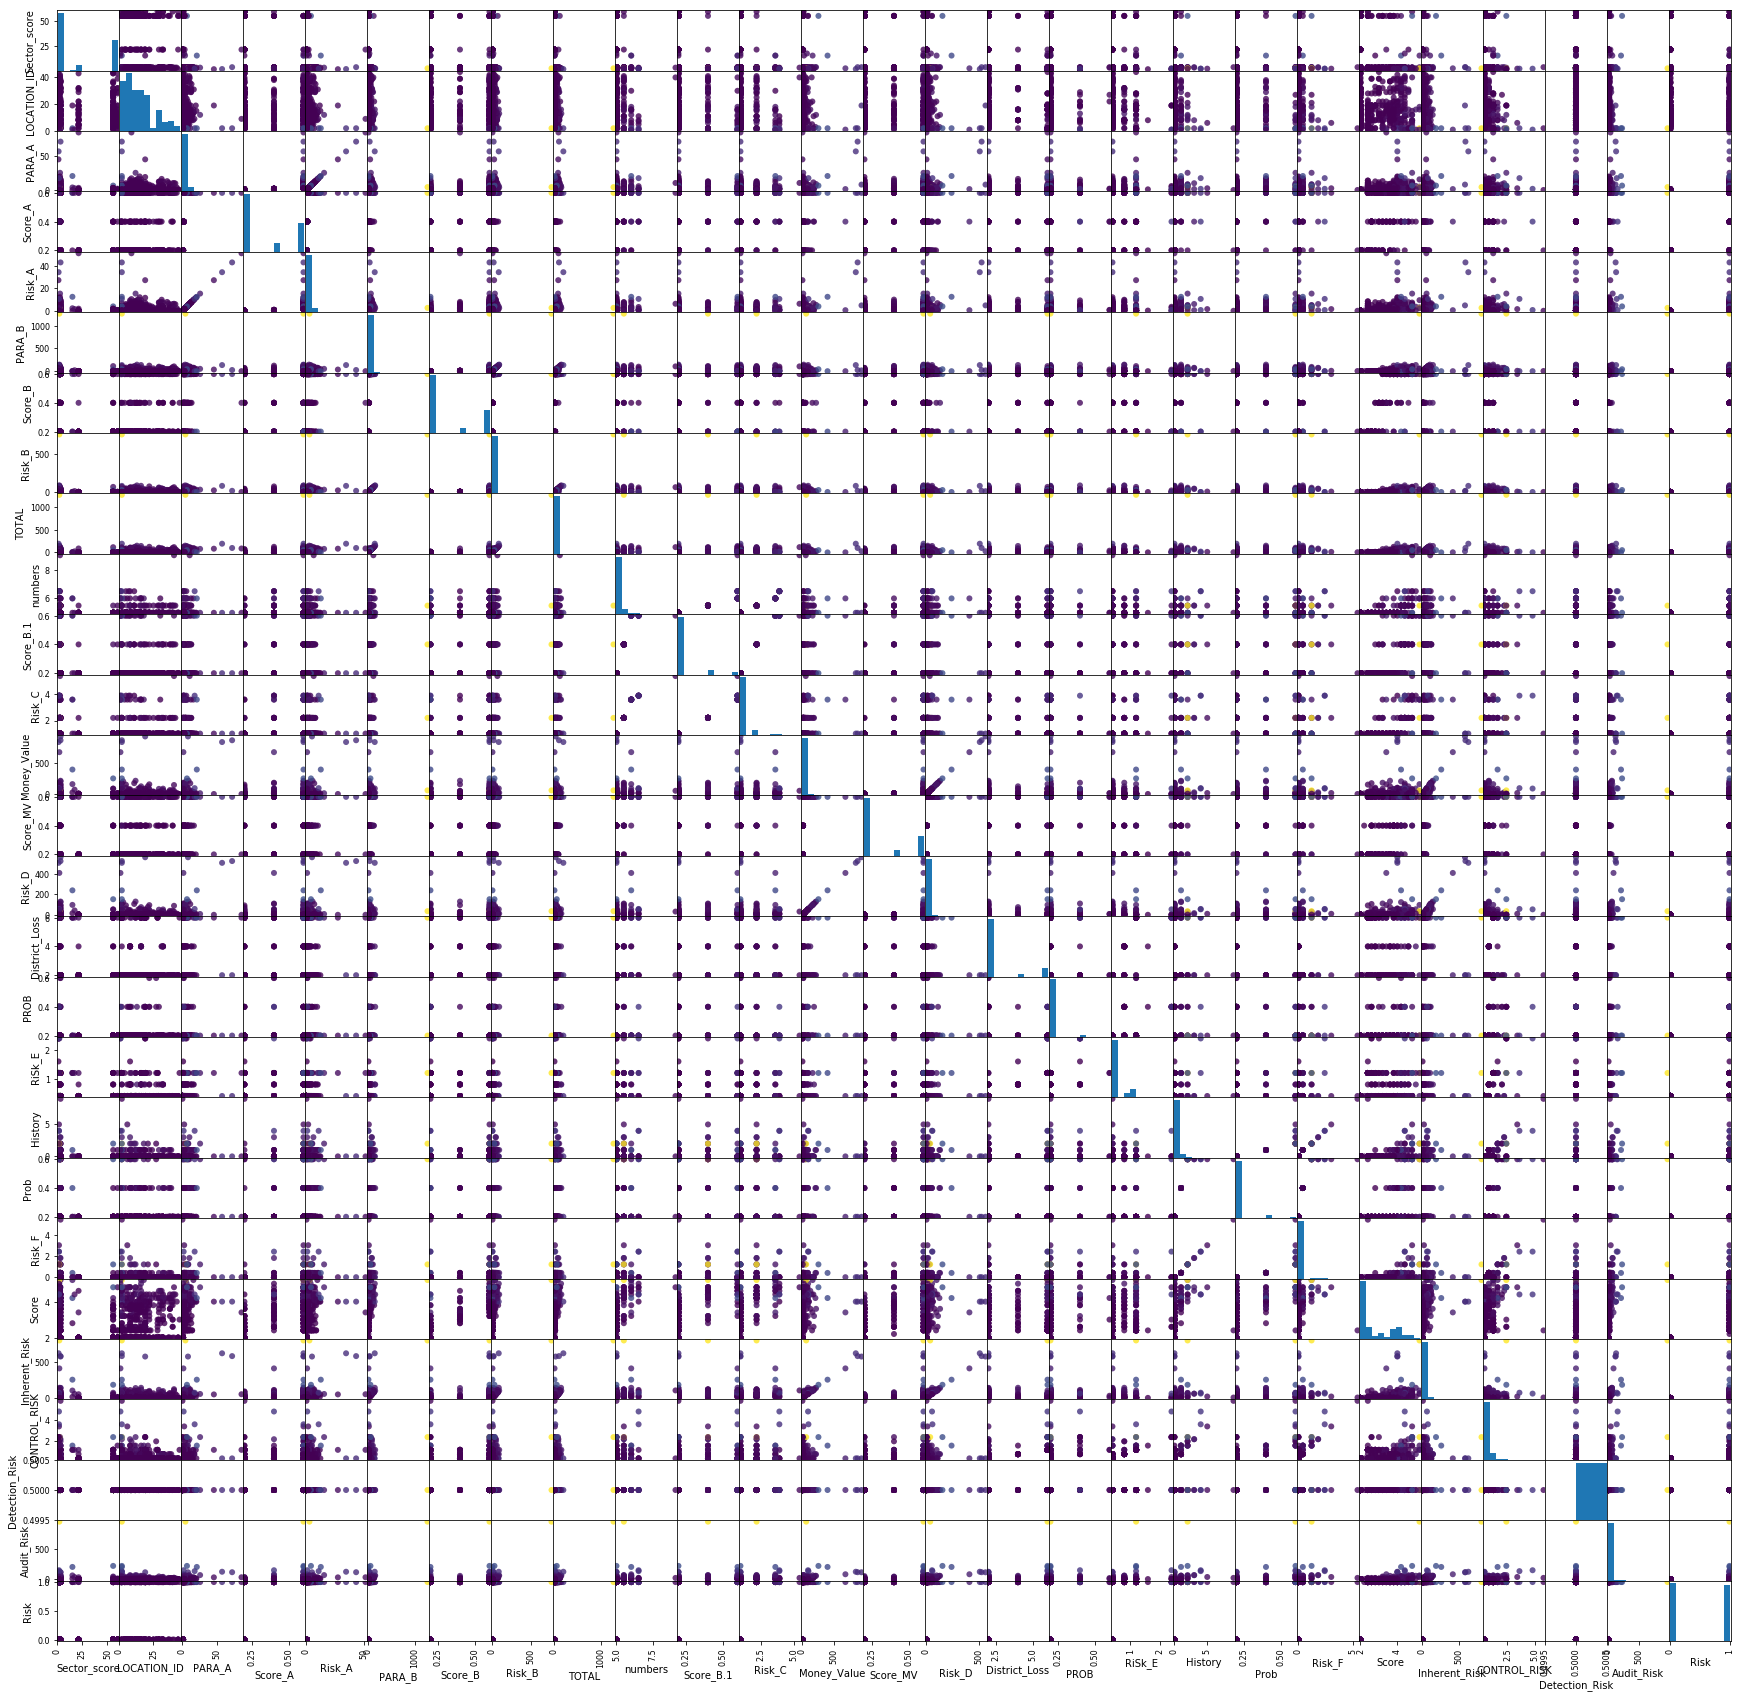

In [14]:
%matplotlib inline
from pandas.plotting import scatter_matrix

data = data

X = pd.DataFrame(data, columns=data.columns)
y = data['Audit_Risk']

attributes = data.columns[:28]
scatter_matrix(X[attributes], figsize = (30,30), c = y, alpha = 0.8, marker = 'O')

#### Data Scaling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data.drop(['Audit_Risk','Risk'], axis =1)
y = data['Audit_Risk']

#split data
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\Johnny\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
f = open('Project1 - Fradulent Firms with CV.csv', 'w')
line  = 'Model Name, Model Parameters,Train Score,Test Score, Mean Cross Validation Training Score, Mean Cross Validation Testing Score\n'
f.write(line)
f.close()

MinMaxScaler is preferred over StandardScaler when data is not normally distributed or the standard deviation is small - applicable to the dataset.

# Regression Task

### KNN

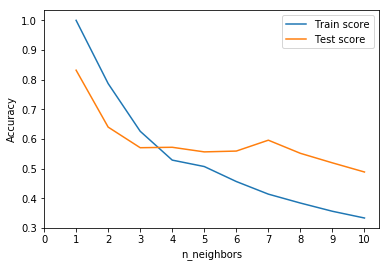

In [17]:
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score = []
test_score = []

for k in range(1,11):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score.append(knn_reg.score(X_train, y_train))
    test_score.append(knn_reg.score(X_test, y_test))

# Show the relationship of accuarcy and n_neighbors
x_axis = range(1,11)
plt.plot(x_axis, train_score, label = 'Train score')
plt.plot(x_axis, test_score, label = 'Test score')
plt.ylabel("Accuracy")
plt.xlabel('n_neighbors')
plt.xticks(np.arange(0,11,step=1))
plt.legend()


In [18]:
print('Training score: ', train_score)
print('Testing score: ', test_score)

Training score:  [1.0, 0.7870429530182704, 0.6264382437300262, 0.5292904148127695, 0.5076277851741305, 0.45716666115946847, 0.4147041902737393, 0.38467791342751445, 0.3569674080415256, 0.33427764126733683]
Testing score:  [0.8320963740159592, 0.6404263748269625, 0.571024586456581, 0.5724799443556656, 0.5569818929597512, 0.5597217380868609, 0.5963657766663293, 0.5521497676333886, 0.5200359424327856, 0.48924201452649596]


The best n_neighbors is ``3``, relatively high test score with small gap from the train score. 

In [19]:
from sklearn.model_selection import GridSearchCV

#Grid search with CV
knr = KNeighborsRegressor()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 11)}
#use gridsearch to test all values for n_neighbors
knrg = GridSearchCV(knr, param_grid, cv=5)
knrg.fit(X_train, y_train)

print('Best parameters {}'.format(knrg.best_params_))
print('Best score {:.6f}'.format(knrg.best_score_))

Best parameters {'n_neighbors': 5}
Best score 0.406315


C:\Users\Johnny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearch with cross validation suggest the best n_neighbors is ``5``

In [20]:
knr = KNeighborsRegressor(5)

cv_train_scores = cross_val_score(knr, X_train, y_train, cv = 5)
cv_test_scores = cross_val_score(knr, X_test, y_test, cv = 5)

print('Cross-validation training scores (5-fold):', cv_train_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_train_scores)))
print('Mean cross-validation testing score (5-fold): {:.3f}'.format(np.mean(cv_test_scores)))

Cross-validation training scores (5-fold): [0.63242412 0.29903292 0.56625004 0.16362919 0.3672425 ]
Mean cross-validation training score (5-fold): 0.406
Mean cross-validation testing score (5-fold): 0.109


In [21]:
knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(X_train, y_train)
print('Train Score: ', knr.score(X_train,y_train))
print('Test Score: ', knr.score(X_test,y_test))

Train Score:  0.5076277851741305
Test Score:  0.5569818929597512


In [22]:
f = open('Project1 - Fradulent Firms with CV.csv', 'a')
line = 'KNeighborsRegressor, n_neighbors = 5, ' + str(knr.score(X_train,y_train)) + ',' + str(knr.score(X_test,y_test)) + ',' + str(np.mean(cv_train_scores)) + ','+ str(np.mean(cv_test_scores)) + '\n'
f.write(line)
f.close()

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Train score: {}'.format(lr.score(X_train, y_train)))
print('Test score: {}'.format(lr.score(X_test,y_test)))


Train score: 0.9430542102922984
Test score: 0.46255788366051986


In [24]:
# Cross Validation

cv_train_scores = cross_val_score(lr, X_train, y_train, cv = 5)
cv_test_scores = cross_val_score(lr, X_test, y_test, cv=5)

print('Cross-validation training scores (5-fold):', cv_train_scores)
print('Mean cross-validation training score (5-fold): {:.5f}'.format(np.mean(cv_train_scores)))
print('Mean cross-validation testing score (5-fold): {:.5f}'.format(np.mean(cv_test_scores)))

Cross-validation training scores (5-fold): [0.57239671 0.17757696 0.27734348 0.52265157 0.4940048 ]
Mean cross-validation training score (5-fold): 0.40879
Mean cross-validation testing score (5-fold): 0.73556


In [25]:
f = open('Project1 - Fradulent Firms with CV.csv', 'a')
line = 'Linear Regression, , ' + str(lr.score(X_train, y_train)) + ',' + str(lr.score(X_test,y_test)) + ',' + str(np.mean(cv_train_scores)) + ',' + str(np.mean(cv_test_scores))+ '\n'
f.write(line)
f.close()

### Ridge

Text(0.5, 0, '$\\alpha$')

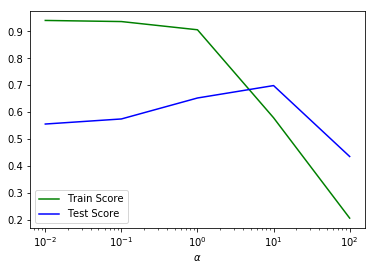

In [26]:
from  sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
%matplotlib inline

x_range = [0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score.append(ridge.score(X_train,y_train))
    test_score.append(ridge.score(X_test, y_test))

    
plt.plot(x_range, train_score, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [27]:
print('Train scores: ', train_score)
print('Test scores: ', test_score)

Train scores:  [0.9410846282251351, 0.9369617876139682, 0.906403889534918, 0.5794563827443922, 0.2064845284760134]
Test scores:  [0.556125804695561, 0.5749805940247615, 0.6528858114686049, 0.6990573443409263, 0.4354919658778653]


This suggests that the best $\alpha$ parameter is ``10``.

In [28]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(X_train, y_train)
print('Train score: {}'.format(ridge.score(X_train, y_train)))
print('Test score: {}'.format(ridge.score(X_test,y_test)))

Train score: 0.5794563827443922
Test score: 0.6990573443409263


Next, used Grid Serach with Cross validation to determine parameters that best generalize the data. 

In [29]:
# Use GridSearchCV to find the best alpha

from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train, y_train)

print('Best parameters {}'.format(grid_search.best_params_))
print('Best score {:.6f}'.format(grid_search.best_score_))

Best parameters {'alpha': 1}
Best score 0.500728


C:\Users\Johnny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


From gridsearch with cross validation, best  $\alpha$ parameter is ``1``.

In [30]:
#Cross Validation

ridge=Ridge(alpha=1)
ridge.fit(X_train, y_train)
cv_train_scores = cross_val_score(ridge, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(ridge, X_test, y_test,cv = 5)


print('Cross-validation training scores (5-fold):', cv_train_scores)
print('Mean cross-validation training score (5-fold): {:.5f}'.format(np.mean(cv_train_scores)))
print('Mean cross-validation testing score (5-fold): {:.3f}'.format(np.mean(cv_test_scores)))

Cross-validation training scores (5-fold): [0.61057512 0.36523727 0.63803412 0.24247457 0.64611696]
Mean cross-validation training score (5-fold): 0.50049
Mean cross-validation testing score (5-fold): -0.819


In [31]:
ridge=Ridge(alpha=1)
ridge.fit(X_train, y_train)
ridge.score(X_train,y_train)
ridge.score(X_test,y_test)

print('Train score: {}'.format(ridge.score(X_train, y_train)))
print('Test score: {}'.format(ridge.score(X_test,y_test)))

Train score: 0.906403889534918
Test score: 0.6528858114686049


In [32]:
f = open('Project1 - Fradulent Firms with CV.csv', 'a')
line = 'Ridge, alpha = 1, ' + str(ridge.score(X_train, y_train)) + ',' + str(ridge.score(X_test,y_test)) + ',' + str(np.mean(cv_train_scores))+ ',' + str(np.mean(cv_test_scores))+ '\n'
f.write(line)
f.close()

### Lasso 

Text(0.5, 0, '$\\alpha$')

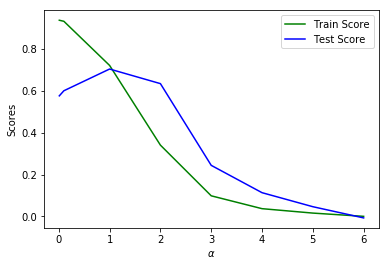

In [33]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
%matplotlib inline

x_range = [0.01, 0.1,1,2,3,4,5,6]
train_score = []
test_score = []
feature = []

for alpha in x_range: 
    lasso = Lasso(alpha=alpha, max_iter=1000000)
    lasso.fit(X_train,y_train)
    train_score.append(lasso.score(X_train,y_train))
    test_score.append(lasso.score(X_test, y_test))
    feature.append(np.sum(lasso.coef_!=0))
    
plt.plot(x_range, train_score, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score, c = 'b', label = 'Test Score')
plt.ylabel("Scores")
plt.xlabel('alpha')
plt.legend()
#plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [34]:
print('Train scores: ', train_score)
print('Test scores: ', test_score)

Train scores:  [0.9374031948023354, 0.9323790532777065, 0.721382441126897, 0.3404458821691855, 0.09816441334125336, 0.03669531512731883, 0.015575889350991192, 0.0]
Test scores:  [0.5759559400228196, 0.6003195077338116, 0.7042043117812893, 0.6344184059754399, 0.24375358110859893, 0.11310548496542416, 0.04608824908474107, -0.0075032152730527555]


This suggests that the best $\alpha$ parameter is ``1``.

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1, max_iter = 1000000)
lasso.fit(X_train, y_train)

print('Train score: {}'.format(lasso.score(X_train, y_train)))
print('Test score: {}'.format(lasso.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Train score: 0.721382441126897
Test score: 0.7042043117812893
Number of features used: 4


Using Grid Search and Cross Validation to determine the parameters that best generalize the data.

In [36]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso(max_iter = 1000000)
param_grid = {'alpha':[.001,0.01, 0.1,1,2,3,4,5,6]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.6f}'.format(grid_search.best_score_))

Best parameters{'alpha': 2}
Best score 0.592294


C:\Users\Johnny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


From gridsearch with cross validation, the best  $\alpha$ parameter is ``2``.

In [37]:
# Cross Validation

lasso = Lasso(alpha = 2,max_iter = 1000000)
lasso.fit(X_train, y_train)
cv_training_scores = cross_val_score(lasso, X_train, y_train,cv = 5)
cv_testing_scores = cross_val_score(lasso, X_test, y_test,cv = 5)


print('Cross-validation training scores (5-fold):', cv_training_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_training_scores)))
print('Mean cross-validation testing score (5-fold): {:.3f}'.format(np.mean(cv_testing_scores)))

Cross-validation training scores (5-fold): [0.83470198 0.72158189 0.72528022 0.01694414 0.65753679]
Mean cross-validation training score (5-fold): 0.591
Mean cross-validation testing score (5-fold): -1.420


In [38]:
lasso = Lasso(alpha = 2,max_iter = 1000000)
lasso.fit(X_train, y_train)
lasso.score(X_train,y_train)
lasso.score(X_test,y_test)

print('Train score: {}'.format(lasso.score(X_train, y_train)))
print('Test score: {}'.format(lasso.score(X_test,y_test)))

Train score: 0.3404458821691855
Test score: 0.6344184059754399


In [39]:
f = open('Project1 - Fradulent Firms with CV.csv', 'a')
line = 'Lasso, alpha = 2 max_iter = 1000000, ' + str(lasso.score(X_train, y_train)) + ',' + str(lasso.score(X_test,y_test)) + ',' + str(np.mean(cv_training_scores))+ ',' + str(np.mean(cv_testing_scores))+ '\n'
f.write(line)
f.close()

### Polynomial Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures
train_score_lrp = []
test_score_lrp = []
train_score_lrridge = []
test_score_lrridge = []
train_score_lrlasso = []
test_score_lrlasso = []



lrp = LinearRegression()
lrridge = Ridge()
lrlasso = Lasso(max_iter=1000000)

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lrp.fit(X_train_poly, y_train)
    train_score_lrp.append(lrp.score(X_train_poly, y_train))
    test_score_lrp.append(lrp.score(X_test_poly, y_test))
    lrridge.fit(X_train_poly, y_train)
    train_score_lrridge.append(lrridge.score(X_train_poly, y_train))
    test_score_lrridge.append(lrridge.score(X_test_poly, y_test))
    lrlasso.fit(X_train_poly, y_train)
    train_score_lrlasso.append(lrlasso.score(X_train_poly, y_train))
    test_score_lrlasso.append(lrlasso.score(X_test_poly, y_test))

print('Polynomial Linear Regression')
print('Train score: {}'.format(lrp.score(X_train_poly, y_train)))
print('Test score: {}\n'.format(lrp.score(X_test_poly,y_test)))
    
print('Polynomial Ridge Regression')
print('Train score: {}'.format(lrridge.score(X_train_poly, y_train)))
print('Test score: {}\n'.format(lrridge.score(X_test_poly,y_test)))

print('Polynomial Lasso Regression')
print('Train score: {}'.format(lrlasso.score(X_train_poly, y_train)))
print('Test score: {}\n'.format(lrlasso.score(X_test_poly,y_test)))


Polynomial Linear Regression
Train score: 1.0
Test score: 0.9862141531862484

Polynomial Ridge Regression
Train score: 0.9988077645708633
Test score: 0.9371258549437879

Polynomial Lasso Regression
Train score: 0.7969672015522242
Test score: 0.9211274457322439



In [41]:
print('Polynomial Linear Regresion Test Score: ', test_score_lrp) # 2
print('Polynomial Ridge Regresion Test Score: ', test_score_lrridge) #3
print('Polynomial Lasso Regresion Test Score: ', test_score_lrlasso) #2


Polynomial Linear Regresion Test Score:  [0.4625578836605254, 0.9995503419786301, 0.9862141531862484]
Polynomial Ridge Regresion Test Score:  [0.6528858114686049, 0.9226049426486945, 0.9371258549437879]
Polynomial Lasso Regresion Test Score:  [0.7042043117812895, 0.9448164734172175, 0.9211274457322439]


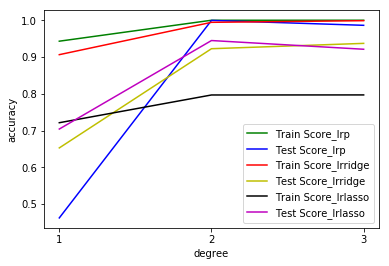

In [42]:
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, train_score_lrp, c = 'g', label = 'Train Score_lrp')
plt.plot(x_axis, test_score_lrp, c = 'b', label = 'Test Score_lrp')
plt.plot(x_axis, train_score_lrridge, c = 'r', label = 'Train Score_lrridge')
plt.plot(x_axis, test_score_lrridge, c = 'y', label = 'Test Score_lrridge')
plt.plot(x_axis, train_score_lrlasso, c = 'k', label = 'Train Score_lrlasso')
plt.plot(x_axis, test_score_lrlasso, c = 'm', label = 'Test Score_lrlasso')
plt.xlabel('degree')
plt.xticks(np.arange(1,4,step=1))
plt.ylabel('accuracy')
plt.legend()

Best score for``Polynomial Linear Regression`` is ``2 degrees``.
<br>
Best score for``Polynomial Ridge Regression`` is ``3 degrees``. 
<br>
Best score for``Polynomial Lasso Regression`` is ``2 degrees``. 


In [43]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)
lrp.fit(X_train_poly2, y_train)
lrlasso.fit(X_train_poly2, y_train)

print('Polynomial Linear Regression Train Score: ',lrp.score(X_train_poly2,y_train))
print('Polynomial Linear Regression Test Score: ',lrp.score(X_test_poly2,y_test))
print('Polynomial Lasso Regression Train Score: ',lrlasso.score(X_train_poly2,y_train))
print('Polynomial Lasso Regression Test Score: ',lrlasso.score(X_test_poly2,y_test))

Polynomial Linear Regression Train Score:  1.0
Polynomial Linear Regression Test Score:  0.9995503419786301
Polynomial Lasso Regression Train Score:  0.7968113535153908
Polynomial Lasso Regression Test Score:  0.9448164734172175


In [44]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)
lrridge.fit(X_train_poly3, y_train)

print('Polynomial Ridge Regression Train Score: ',lrridge.score(X_train_poly3,y_train))
print('Polynomial Ridge Regression Test Score: ',lrridge.score(X_test_poly3,y_test))

Polynomial Ridge Regression Train Score:  0.9988077645708633
Polynomial Ridge Regression Test Score:  0.9371258549437879


In [45]:
# Cross-Validation

cv_train_scores_lrp = cross_val_score(lrp, X_train_poly2, y_train, cv = 5)
cv_test_scores_lrp = cross_val_score(lrp, X_test_poly2, y_test, cv = 5)
print('Cross-validation training scores (5-fold):', cv_train_scores_lrp)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_train_scores_lrp)))
print('Mean cross-validation testing score (5-fold): {:.3f}'.format(np.mean(cv_test_scores_lrp)))


cv_train_scores_lrridge = cross_val_score(lrridge, X_train_poly3, y_train, cv = 5)
cv_test_scores_lrridge = cross_val_score(lrridge, X_test_poly3, y_test, cv = 5)
print('Cross-validation training scores (5-fold):', cv_train_scores_lrridge)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_train_scores_lrridge)))
print('Mean cross-validation testing score (5-fold): {:.3f}'.format(np.mean(cv_test_scores_lrridge)))


cv_train_scores_lrlasso = cross_val_score(lrlasso, X_train_poly2, y_train, cv = 5)
cv_test_scores_lrlasso = cross_val_score(lrlasso, X_test_poly2, y_test, cv = 5)
print('Cross-validation training scores (5-fold):', cv_train_scores_lrlasso)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_train_scores_lrlasso)))
print('Mean cross-validation testing score (5-fold): {:.3f}'.format(np.mean(cv_test_scores_lrlasso)))


Cross-validation training scores (5-fold): [0.97235716 0.99714535 0.99691306 0.9858142  0.84117852]
Mean cross-validation training score (5-fold): 0.959
Mean cross-validation testing score (5-fold): 0.933
Cross-validation training scores (5-fold): [0.93648887 0.74018119 0.93895245 0.61877418 0.88591619]
Mean cross-validation training score (5-fold): 0.824
Mean cross-validation testing score (5-fold): 0.697
Cross-validation training scores (5-fold): [0.94850098 0.8629952  0.94152753 0.08321406 0.92487654]
Mean cross-validation training score (5-fold): 0.752
Mean cross-validation testing score (5-fold): -0.306


In [46]:
f = open('Project1 - Fradulent Firms with CV.csv', 'a')
line = 'Polynomial Linear Regression, degrees = 2, ' + str(lrp.score(X_train_poly2,y_train)) + ',' + str(lrp.score(X_test_poly2,y_test)) + ',' + str(np.mean(cv_train_scores_lrp))+ ','+ str(np.mean(cv_test_scores_lrp))+ '\n'
f.write(line)
f.close()

In [47]:
f = open('Project1 - Fradulent Firms with CV.csv', 'a')
line = 'Polynomial Lasso Regression, degrees = 2, ' + str(lrlasso.score(X_train_poly2,y_train)) + ',' + str(lrlasso.score(X_test_poly2,y_test)) + ',' + str(np.mean(cv_train_scores_lrlasso))+ ','+ str(np.mean(cv_test_scores_lrlasso))+ '\n'
f.write(line)
f.close()

In [48]:
f = open('Project1 - Fradulent Firms with CV.csv', 'a')
line = 'Polynomial Ridge Regression, degrees = 3, ' + str(lrridge.score(X_train_poly3,y_train)) + ',' + str(lrridge.score(X_test_poly3,y_test)) + ',' + str(np.mean(cv_train_scores_lrridge))+ ','+ str(np.mean(cv_test_scores_lrridge))+'\n'
f.write(line)
f.close()

### SVM

##### SVR with kernel = ' rbf'

In [49]:
from sklearn.svm import SVR
# Using the default parameters for C and Gamma to determine train and test scores

svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
print('Train score: {}'.format(svr.score(X_train, y_train)))
print('Test score: {}\n'.format(svr.score(X_test,y_test)))

Train score: 0.0281383722089924
Test score: 0.10528594480612874



In [50]:
from sklearn.model_selection import GridSearchCV

svr = SVR(kernel = 'rbf')
param_grid = param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(svr, param_grid, cv = 5, return_train_score=True)
grid_search.fit(X_train, y_train)

print('Best parameters {}'.format(grid_search.best_params_))
print('Best score {:.6f}'.format(grid_search.best_score_))

Best parameters {'C': 10, 'gamma': 0.1}
Best score 0.382346


C:\Users\Johnny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


This suggest the best parameters are C = ``10`` and $\gamma$ = ``0.1`` when using ``rbf`` kernel.

In [51]:
svr = SVR(C=10, kernel='rbf', gamma=0.1)
svr.fit(X_train,y_train)
print('Training score: ', svr.score(X_train, y_train))
print('Testing score: ',svr.score(X_test, y_test))

Training score:  0.1481824633818033
Testing score:  0.4205009530146122


In [52]:
#Cross-Validation

cv_train_scores = cross_val_score(svr, X_train, y_train, cv = 5)
cv_test_scores = cross_val_score(svr, X_test, y_test, cv = 5)

print('Cross-validation training scores (5-fold):', cv_train_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_train_scores)))
print('Mean cross-validation testing score (5-fold): {:.3f}'.format(np.mean(cv_test_scores)))

Cross-validation training scores (5-fold): [0.53824836 0.58618789 0.43800027 0.06824826 0.27657972]
Mean cross-validation training score (5-fold): 0.381
Mean cross-validation testing score (5-fold): 0.365


In [53]:
f = open('Project1 - Fradulent Firms with CV.csv', 'a')
line = 'SVM with kernel, C=10  kernel=rbf  gamma=0.1, ' + str(svr.score(X_train,y_train)) + ',' + str(svr.score(X_test,y_test)) + ',' + str(np.mean(cv_train_scores))+ ','+ str(np.mean(cv_test_scores))+ '\n'
f.write(line)
f.close()

##### LinearSVR

In [54]:
from sklearn.svm import LinearSVR
#Simple SVM

svm = LinearSVR()
svm.fit(X_train, y_train)
print('Train score: {}'.format(svm.score(X_train, y_train)))
print('Test score: {}\n'.format(svm.score(X_test,y_test)))

Train score: 0.12012538588880262
Test score: 0.33417491336924976



In [55]:
from sklearn.model_selection import GridSearchCV

svm = LinearSVR(max_iter=10000000)
param_grid = param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(svm, param_grid, cv = 5, return_train_score=True)
grid_search.fit(X_train, y_train)


#use gridsearch to get the best parameters, alpha=0.001
print('Best parameters {}'.format(grid_search.best_params_))
print('Best score {:.6f}'.format(grid_search.best_score_))

Best parameters {'C': 10}
Best score 0.627164


C:\Users\Johnny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [56]:
svm = LinearSVR(C=10, max_iter=10000000)
svm.fit(X_train,y_train)

print('Training score: ', svm.score(X_train, y_train))
print('Testing score: ',svm.score(X_test, y_test))

Training score:  0.33908273994978777
Testing score:  0.6754334026796351


In [57]:
# Cross Validation

cv_train_scores = cross_val_score(svm, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(svm, X_test, y_test,cv = 5)

print('Cross-validation training scores (5-fold):', cv_train_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_train_scores)))
print('Mean cross-validation testing score (5-fold): {:.3f}'.format(np.mean(cv_test_scores)))

Cross-validation training scores (5-fold): [0.89502889 0.86216028 0.60541087 0.2134704  0.55454069]
Mean cross-validation training score (5-fold): 0.626
Mean cross-validation testing score (5-fold): 0.319


In [58]:
f = open('Project1 - Fradulent Firms with CV.csv', 'a')
line = 'SVM, C=10  max_iter=10000000, ' + str(svm.score(X_train, y_train)) + ',' + str(svm.score(X_test,y_test)) + ',' + str(np.mean(cv_train_scores)) + ','+ str(np.mean(cv_test_scores))+ '\n'
f.write(line)
f.close()

## Evaluation

In [59]:
Regression = pd.read_csv('Project1 - Fradulent Firms with CV.csv')
Regression

,Model Name,Model Parameters,Train Score,Test Score,Mean Cross Validation Training Score,Mean Cross Validation Testing Score
0,KNeighborsRegressor,n_neighbors = 5,0.507628,0.556982,0.405716,0.108535
1,Linear Regression,,0.943054,0.462558,0.408795,0.735557
2,Ridge,alpha = 1,0.906404,0.652886,0.500488,-0.819130
3,Lasso,alpha = 2 max_iter = 1000000,0.340446,0.634418,0.591209,-1.420164
4,Polynomial Linear Regression,degrees = 2,1.000000,0.999550,0.958682,0.932776
5,Polynomial Lasso Regression,degrees = 2,0.796811,0.944816,0.752223,-0.306289
6,Polynomial Ridge Regression,degrees = 3,0.998808,0.937126,0.824063,0.697115
7,SVM with kernel,C=10 kernel=rbf gamma=0.1,0.148182,0.420501,0.381453,0.364835
8,SVM,C=10 max_iter=10000000,0.339083,0.675433,0.626122,0.319268


``Polynomial Linear Regression`` is the best regression model to use for this dataset

## Prediction

In [60]:
#Polynomial Linear Regression

polyl = PolynomialFeatures(degree=2)
X_poly=polyl.fit_transform(X)
X_train_poly = polyl.fit_transform(X_train)
X_test_poly = polyl.transform(X_test)
cv_score = cross_val_score(lrp, X_poly, y, cv=5)

print('Cross-validation scores (5-fold):', cv_score)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_score)))


Cross-validation scores (5-fold): [0.99992101 0.9999992  0.99995454 0.99994531 1.        ]
Mean cross-validation training score (5-fold): 1.000


In [61]:
lrp.fit(X_train_poly, y_train)
y_pred_poly = lrp.predict(X_test_poly)
y_pred_poly

array([  0.4532    ,   1.3908    ,   2.2216    ,  23.77      ,
         0.308     ,   0.35      ,   0.3048    ,   0.3216    ,
         0.3008    ,   5.7736    ,   0.338     ,   1.2348    ,
        25.2576    ,   2.9856    ,   0.2836    ,   1.32      ,
        27.4032    ,   0.3756    ,   0.2888    ,   0.3188    ,
        22.62484072,   3.0332    ,   0.28      ,   0.3124    ,
         0.3192    ,   0.28      ,  21.6724    ,   1.398     ,
         0.3284    ,   4.6592    ,   7.95255204,   0.2988    ,
         2.4816    ,   0.3128    ,  13.824     ,   4.6924    ,
         1.4988    ,  39.0624    ,   6.572     ,  12.7652    ,
         0.28      ,   0.2808    ,   0.2888    ,   1.0144    ,
         0.3224    ,  10.0688    ,   0.2912    ,   0.28      ,
         0.3888    ,  20.268     ,   1.568     ,   0.3192    ,
         0.3012    ,   1.5516    ,   0.2812    ,   0.5108    ,
        62.32767207,   2.21      ,   0.3476    ,   1.572     ,
         8.36856749,  57.27507302,   0.3396    ,   0.28

In [62]:
test_set = pd.DataFrame()
test_set['Audit Risk Predictions'] = lrp.predict(X_test_poly)
test_set.head(20)

,Audit Risk Predictions
0,0.4532
1,1.3908
2,2.2216
3,23.7700
4,0.3080
5,0.3500
6,0.3048
7,0.3216
8,0.3008
9,5.7736


# Classification Task

In [63]:
X = data.drop(['Audit_Risk','Risk'], axis =1).values
y = data['Risk'].values

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#split data
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [65]:
f = open('Project1 - Fradulent Firms_Classification.csv', 'w')
line  = 'Model Name, Model Parameters,Train Score,Test Score, Accuracy\n'
f.write(line)
f.close()

### Logistc Regression 

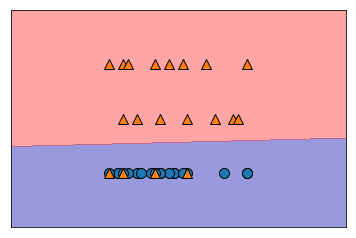

In [66]:
from sklearn.linear_model import LogisticRegression
import mglearn
%matplotlib inline

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))
    
X_b = X_train[10:50, [1,3]]
y_b = y_train[10:50]

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(lreg, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

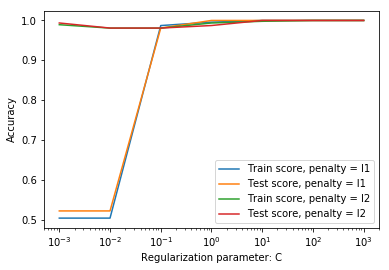

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [68]:
print('Train l1 score: ', train_score_l1)
print('Test l1 score: ', test_score_l1)
print('Train l2 score: ', train_score_l2)
print('Test l2 score: ', test_score_l2)

print('Train l1 score: ', max(train_score_l1))
print('Test l1 score: ', max(test_score_l1))
print('Train l2 score: ', max(train_score_l2))
print('Test l2 score: ', max(test_score_l2))


Train l1 score:  [0.5042735042735043, 0.5042735042735043, 0.9871794871794872, 0.9957264957264957, 1.0, 1.0, 1.0]
Test l1 score:  [0.5222929936305732, 0.5222929936305732, 0.9808917197452229, 1.0, 1.0, 1.0, 1.0]
Train l2 score:  [0.9893162393162394, 0.9807692307692307, 0.9807692307692307, 0.9935897435897436, 0.9978632478632479, 1.0, 1.0]
Test l2 score:  [0.9936305732484076, 0.9808917197452229, 0.9808917197452229, 0.9872611464968153, 1.0, 1.0, 1.0]
Train l1 score:  1.0
Test l1 score:  1.0
Train l2 score:  1.0
Test l2 score:  1.0


In [69]:
from sklearn.model_selection import GridSearchCV

log = LogisticRegression()
#create a dictionary of all values we want to test
param_grid = {'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}
#use gridsearch to test all values for penalty and C
logr= GridSearchCV(log, param_grid, cv=5)
logr.fit(X_train, y_train)

print('Best parameters {}'.format(logr.best_params_))
print('Best score {:.6f}'.format(logr.best_score_))

Best parameters {'C': 100, 'penalty': 'l1'}
Best score 0.995726


This suggest the best parameters are C= ``100`` and penalty = ``l1``

In [70]:
log = LogisticRegression(penalty='l1')
log.fit(X_train, y_train)
print('Train score: {:.4f}'.format(log.score(X_train, y_train)))
print('Test score: {:.4f}'.format(log.score(X_test, y_test)))

Train score: 0.9957
Test score: 1.0000


In [71]:
from sklearn.metrics import confusion_matrix

log = LogisticRegression(penalty='l1')
log.fit(X_train,y_train)
pred = log.predict(X_test)

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Confusion matrix:
[[82  0]
 [ 0 75]]


In [72]:
# Using KNN to classify Fraud
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_accuracy = accuracy_score(y_test, pred)
print(classification_report(y_test,pred))
print("The accuracy of the KNN Classifier is :"+str(log_accuracy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        75

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157

The accuracy of the KNN Classifier is :1.0


In [73]:
f = open('Project1 - Fradulent Firms_Classification.csv', 'a')
line = 'Logistic Regression, penalty=l1 C=100, ' + str(log.score(X_train,y_train)) + ',' + str(log.score(X_test,y_test)) + ',' + str(log_accuracy) + '\n'
f.write(line)
f.close()

### KNN Classifier

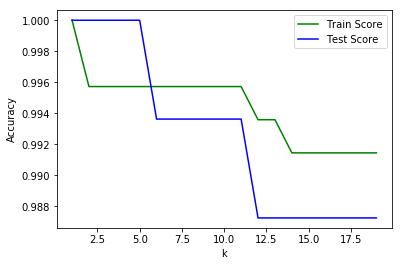

In [74]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
#we want both scores as high as they can and same time as close as we can 

This suggest k can be anywhere from ``2-5`` is the best parameter for KNN Classifier

In [75]:
#Using Gridsearch to find the best parameters

from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 15)}
#use gridsearch to test all values for n_neighbors
knc = GridSearchCV(knn, param_grid, cv=5)
knc.fit(X_train, y_train)

print('Best parameters {}'.format(knc.best_params_))
print('Best score {:.6f}'.format(knc.best_score_))

Best parameters {'n_neighbors': 2}
Best score 0.995726


Gridsearch with cross validation suggest using ``2`` neareast neighbors is the best.

In [76]:
knn = KNeighborsClassifier(2)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9957
Test score: 1.0000


In [77]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(2)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Confusion matrix:
[[82  0]
 [ 0 75]]


In [78]:
# Using KNN to classify Fraud
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

knn_accuracy = accuracy_score(y_test, knn_pred)
print(classification_report(y_test,pred))
print("The accuracy of the KNN Classifier is :"+str(log_accuracy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        75

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157

The accuracy of the KNN Classifier is :1.0


In [79]:
f = open('Project1 - Fradulent Firms_Classification.csv', 'a')
line = 'KNeighborsClassification, n_neighbors = 2, ' + str(knn.score(X_train,y_train)) + ',' + str(knn.score(X_test,y_test)) + ',' + str(knn_accuracy) + '\n'
f.write(line)
f.close()

### SVM Classifier

#### Linear SVM

In [80]:
#Using Gridsearch to find the best parameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(kernel='linear')
#create a dictionary of all values we want to test for n_neighbors
param_grid ={'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
#use gridsearch to test all values for n_neighbors
svmg = GridSearchCV(svm, param_grid, cv=5)
svmg.fit(X_train, y_train)

print('Best parameters {}'.format(svmg.best_params_))
print('Best score {:.6f}'.format(svmg.best_score_))



Best parameters {'C': 1, 'gamma': 0.001}
Best score 0.995726


This suggest the best parameters are C= ``1`` and  $\gamma$ = ``0.001``.

In [81]:
svm = SVC(C=1,gamma=.001)
svm.fit(X_train, y_train)

print('Train score: {:.4f}'.format(svm.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svm.score(X_test, y_test)))

Train score: 0.7308
Test score: 0.7389


In [82]:
pred = svm.predict(X_test)

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Confusion matrix:
[[82  0]
 [41 34]]


In [83]:
from sklearn.metrics import accuracy_score

svm_accuracy = accuracy_score(y_test, pred)
print(classification_report(y_test,pred))
print("The accuracy of SVC with Linear Kernel Classifier is :"+str(svm_accuracy))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        82
           1       1.00      0.45      0.62        75

   micro avg       0.74      0.74      0.74       157
   macro avg       0.83      0.73      0.71       157
weighted avg       0.83      0.74      0.72       157

The accuracy of SVC with Linear Kernel Classifier is :0.7388535031847133


In [84]:
f = open('Project1 - Fradulent Firms_Classification.csv', 'a')
line = 'SVM, C=1 gamma=10, ' + str(svm.score(X_train,y_train)) + ',' + str(svm.score(X_test,y_test)) + ',' + str(svm_accuracy) + '\n'
f.write(line)
f.close()

#### Kernelized Support Vector Machine - RBF

In [85]:
#Using Gridsearch to find the best parameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_rbf = SVC(kernel='rbf', random_state = 0)
#create a dictionary of all values we want to test for n_neighbors
param_grid ={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 100]}
#use gridsearch to test all values for n_neighbors
svmrbf = GridSearchCV(svm_rbf, param_grid, cv=5)
svmrbf.fit(X_train, y_train)

print('Best parameters {}'.format(svmrbf.best_params_))
print('Best score {:.6f}'.format(svmrbf.best_score_))


Best parameters {'C': 0.1, 'gamma': 5}
Best score 1.000000


C:\Users\Johnny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


This suggest the best parameters are C= ``0.1`` and  $\gamma$ = ``5``.

In [86]:
svm_rbf = SVC(C=50.1,gamma=5)
svm_rbf.fit(X_train, y_train)

print('Train score: {:.4f}'.format(svm_rbf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svm_rbf.score(X_test, y_test)))

Train score: 1.0000
Test score: 1.0000


In [87]:
pred = svm_rbf.predict(X_test)

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Confusion matrix:
[[82  0]
 [ 0 75]]


In [88]:
from sklearn.metrics import accuracy_score

svm_rbf_accuracy = accuracy_score(y_test, pred)
print(classification_report(y_test,pred))
print("The accuracy of SVC with Linear Kernel Classifier is :"+str(svm_rbf_accuracy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        75

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157

The accuracy of SVC with Linear Kernel Classifier is :1.0


In [89]:
f = open('Project1 - Fradulent Firms_Classification.csv', 'a')
line = 'SVM with Kernel, kernel=RBF C=0.1 gamma=5, ' + str(svmrbf.score(X_train,y_train)) + ',' + str(svmrbf.score(X_test,y_test)) + ',' + str(svm_rbf_accuracy) + '\n'
f.write(line)
f.close()

### Decision tree 

In [90]:
from sklearn.tree import DecisionTreeClassifier
#Using Gridsearch to find the best parameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'max_depth': [2,3,5,10, 20, 50, 100]}
#use gridsearch to test all values for n_neighbors
dtreeg = GridSearchCV(dtree, param_grid, cv=5)
dtreeg.fit(X_train, y_train)

print('Best parameters {}'.format(dtreeg.best_params_))
print('Best score {:.6f}'.format(dtreeg.best_score_))


Best parameters {'max_depth': 2}
Best score 0.997863


This suggest the best parameter is max_depth= ``2``

In [91]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)

print('Train score: {:.4f}'.format(dtree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(dtree.score(X_test, y_test)))

Train score: 1.0000
Test score: 1.0000


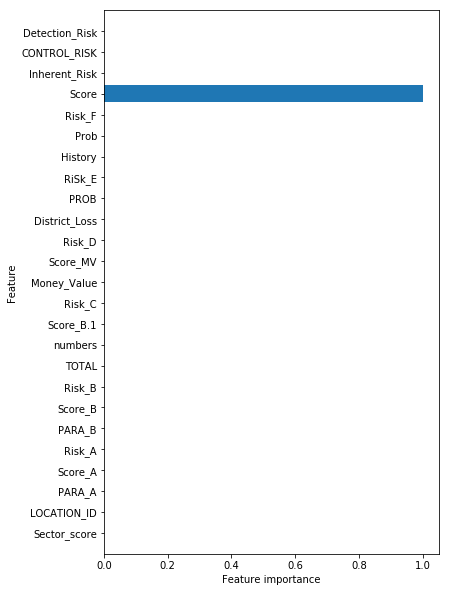

In [92]:
%matplotlib inline

def plot_feature_importances_audit(model):
    fig= plt.figure(figsize=(6,10))
    n_features = X_train_org.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_audit(dtree)

This suggest that ``Score`` is an important feature.

In [93]:
pred_tree = dtree.predict(X_test)

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred_tree)))

Confusion matrix:
[[82  0]
 [ 0 75]]


In [94]:
from sklearn.metrics import accuracy_score

dtree_accuracy = accuracy_score(y_test, pred)
print(classification_report(y_test,pred))
print("The accuracy of SVC with Linear Kernel Classifier is :"+str(svm_rbf_accuracy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        75

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157

The accuracy of SVC with Linear Kernel Classifier is :1.0


In [95]:
f = open('Project1 - Fradulent Firms_Classification.csv', 'a')
line = 'Decision Tree, max_depth=2, ' + str(dtree.score(X_train,y_train)) + ',' + str(dtree.score(X_test,y_test)) + ',' + str(dtree_accuracy) + '\n'
f.write(line)
f.close()

## Evaluation

In [96]:
Classification = pd.read_csv('Project1 - Fradulent Firms_Classification.csv')
Classification

,Model Name,Model Parameters,Train Score,Test Score,Accuracy
0,Logistic Regression,penalty=l1 C=100,0.995726,1.000000,1.000000
1,KNeighborsClassification,n_neighbors = 2,0.995726,1.000000,1.000000
2,SVM,C=1 gamma=10,0.730769,0.738854,0.738854
3,SVM with Kernel,kernel=RBF C=0.1 gamma=5,1.000000,1.000000,1.000000
4,Decision Tree,max_depth=2,1.000000,1.000000,1.000000


This suggest ``Logistic Regression, KNN Classification, SVM with RBF kernel and Decision Tree`` are the models to use, and they provided 100% accuracy results.

# Summary

In [97]:
from IPython.display import display, HTML
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

printmd("**Regression Task:**")
display(Regression)
print() 
print() 
printmd("**Classification Task:**")
display(HTML(Classification.to_html()))

**Regression Task:**

,Model Name,Model Parameters,Train Score,Test Score,Mean Cross Validation Training Score,Mean Cross Validation Testing Score
0,KNeighborsRegressor,n_neighbors = 5,0.507628,0.556982,0.405716,0.108535
1,Linear Regression,,0.943054,0.462558,0.408795,0.735557
2,Ridge,alpha = 1,0.906404,0.652886,0.500488,-0.819130
3,Lasso,alpha = 2 max_iter = 1000000,0.340446,0.634418,0.591209,-1.420164
4,Polynomial Linear Regression,degrees = 2,1.000000,0.999550,0.958682,0.932776
5,Polynomial Lasso Regression,degrees = 2,0.796811,0.944816,0.752223,-0.306289
6,Polynomial Ridge Regression,degrees = 3,0.998808,0.937126,0.824063,0.697115
7,SVM with kernel,C=10 kernel=rbf gamma=0.1,0.148182,0.420501,0.381453,0.364835
8,SVM,C=10 max_iter=10000000,0.339083,0.675433,0.626122,0.319268


**Classification Task:**

,Model Name,Model Parameters,Train Score,Test Score,Accuracy
0,Logistic Regression,penalty=l1 C=100,0.995726,1.000000,1.000000
1,KNeighborsClassification,n_neighbors = 2,0.995726,1.000000,1.000000
2,SVM,C=1 gamma=10,0.730769,0.738854,0.738854
3,SVM with Kernel,kernel=RBF C=0.1 gamma=5,1.000000,1.000000,1.000000
4,Decision Tree,max_depth=2,1.000000,1.000000,1.000000


__Regression Task:__
``Polynomial Linear Regression`` is the best regression model to use for this dataset


__Classificiation Task:__
This suggest ``Logistic Regression, KNN Classification, SVM with RBF kernel and Decision Tree`` are the models to use, and they provided 100% accuracy results.